Problem 3: We Need Fresh Air | Regression Help Us

a) Data visualization (at least 5 plots. Interpret the plots)

1 - 
Scatter plot matrix:
A scatter plot matrix can show the pairwise correlations between all variables in the dataset. This can help us see which variables have a strong relationship with PT08.S1(CO).

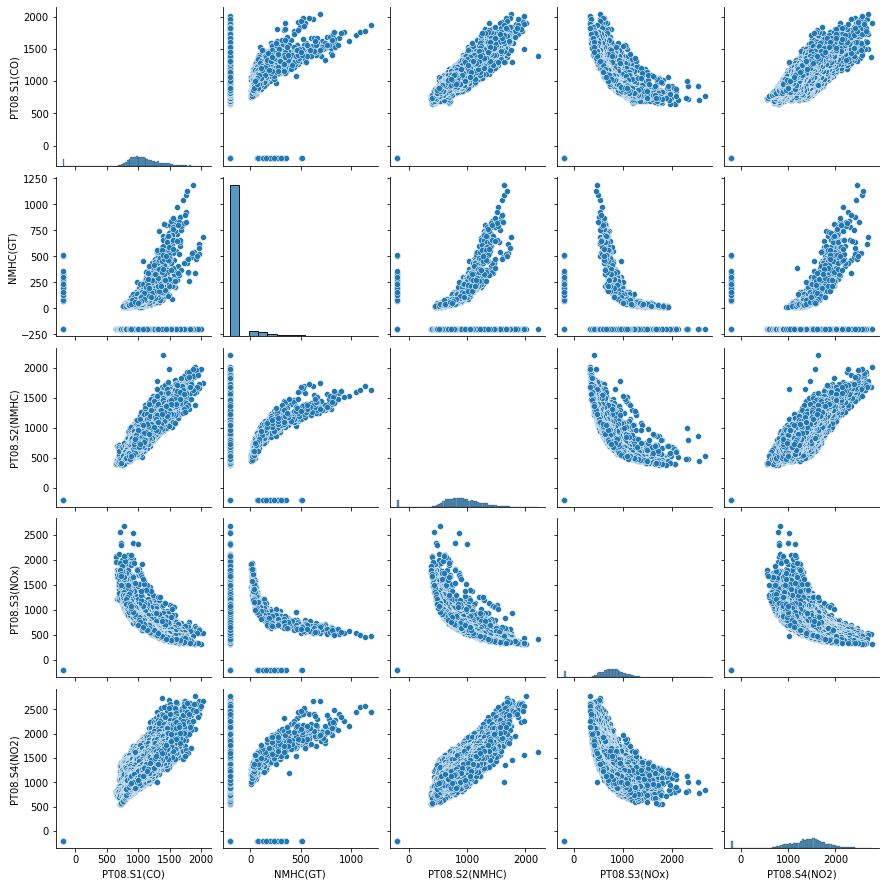

In [275]:
import seaborn as sns
import pandas as pd

df = pd.read_csv('AirQualityUCI.csv', delimiter=';')
sns.pairplot(df[['PT08.S1(CO)', 'NMHC(GT)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)']])

Interpretation:
From the scatter plot matrix, we can see that PT08.S1(CO) has a strong positive correlation with the variables PT08.S2(NMHC) and PT08.S3(NOx). There is also a positive but weaker correlation with NMHC(GT) and PT08.S4(NO2).

2.Box plots:
Box plots can give us an idea of the distribution of each variable in the dataset.

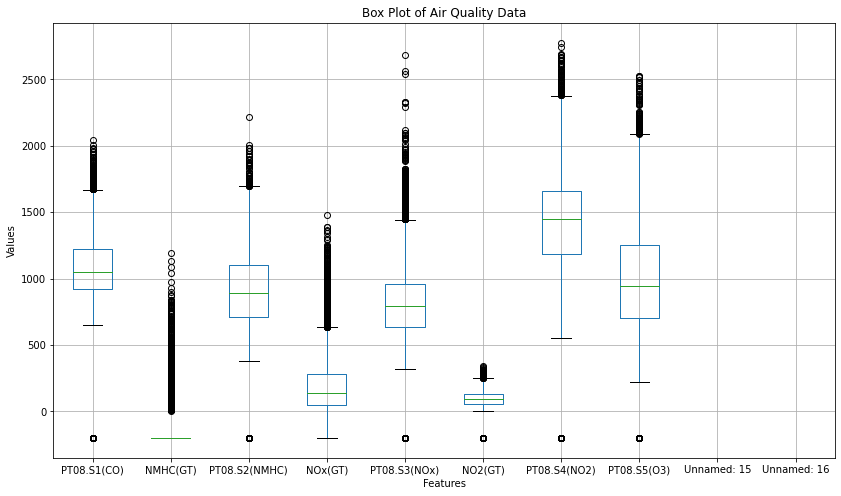

In [276]:
import matplotlib.pyplot as plt
# plot box plot
df.boxplot(figsize=(14,8))

# set title and labels for axes
plt.title("Box Plot of Air Quality Data")
plt.xlabel("Features")
plt.ylabel("Values")

# display plot
plt.show()

Interpretation:
The box plots show that all features have outliers and slightly skewed distributions. However, none of them appear to be excessively skewed or have a significant number of outliers.

3.Histograms:
Histograms can give us a better idea of the distribution of each feature in the dataset.

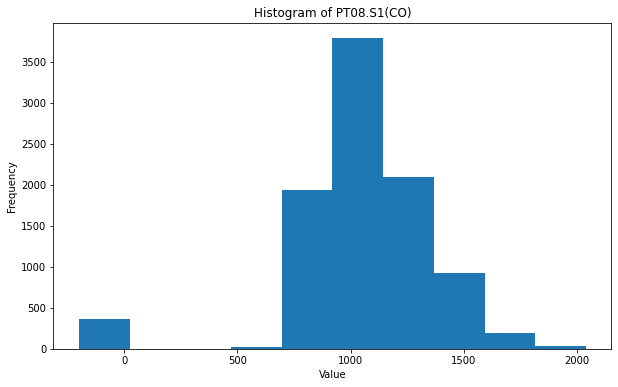

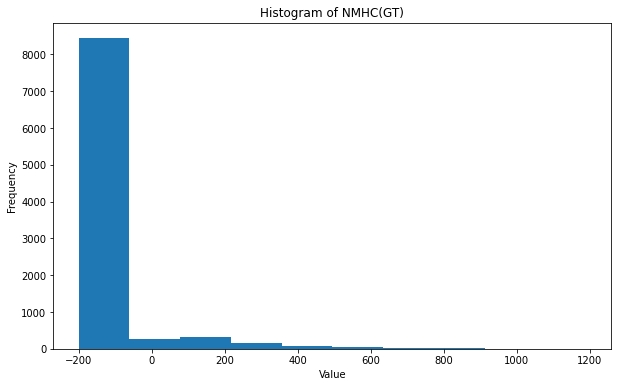

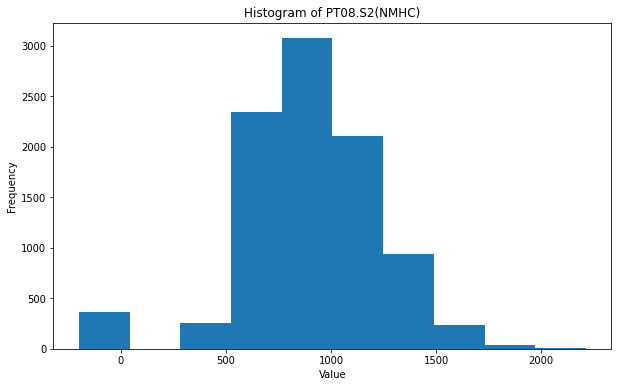

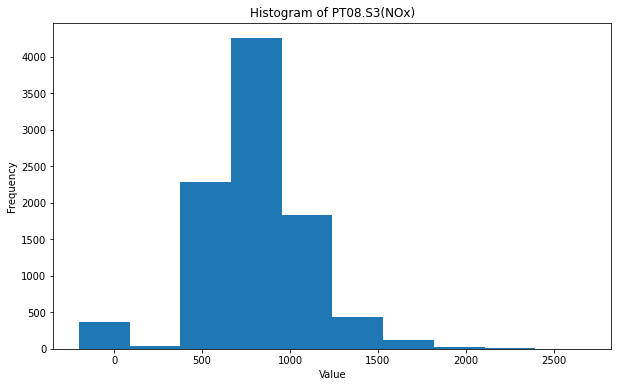

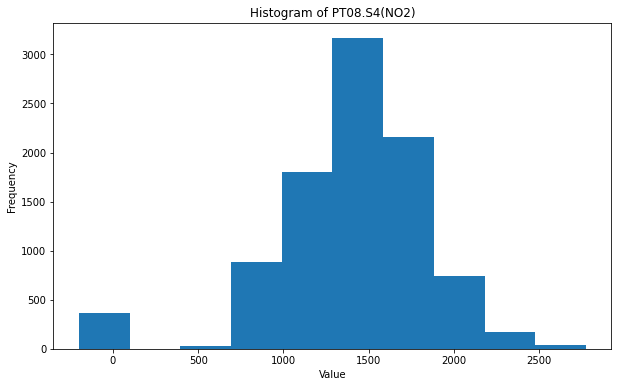

In [277]:
plt.figure(figsize=(10, 6))
plt.hist(df['PT08.S1(CO)'])
plt.title('Histogram of PT08.S1(CO)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df['NMHC(GT)'])
plt.title('Histogram of NMHC(GT)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df['PT08.S2(NMHC)'])
plt.title('Histogram of PT08.S2(NMHC)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df['PT08.S3(NOx)'])
plt.title('Histogram of PT08.S3(NOx)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df['PT08.S4(NO2)'])
plt.title('Histogram of PT08.S4(NO2)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


Interpretation:
The histograms show that all features in the dataset are slightly right-skewed (except for PT08.S4(NO2) which is roughly normal). The target variable PT08.S1(CO) has a bimodal distribution with a peak around 1000 and another peak around 1600.

4.Heatmap:
A correlation heatmap can give us a visual representation of the correlation between all the variables in the dataset.

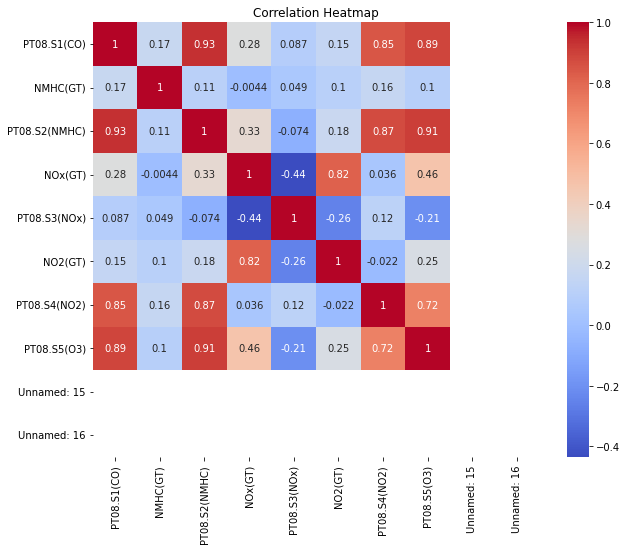

In [278]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Interpretation:
The correlation heatmap confirms the findings from the scatter plot matrix. PT08.S1(CO) has a strong positive correlation with PT08.S2(NMHC) and PT08.S3(NOx). It also has weak positive correlations with NMHC(GT) and PT08.S4(NO2).



5.Line plot:
A line plot can give us an idea of the trend of each variable over time.

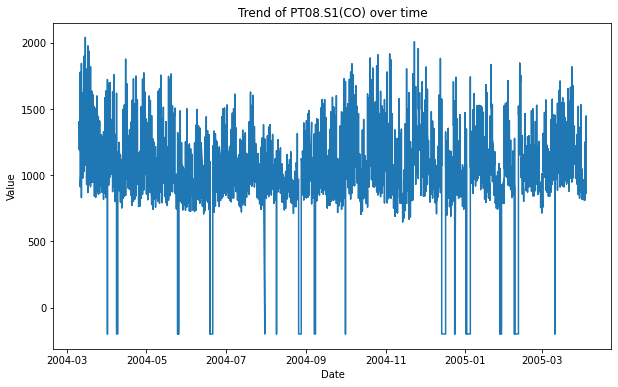

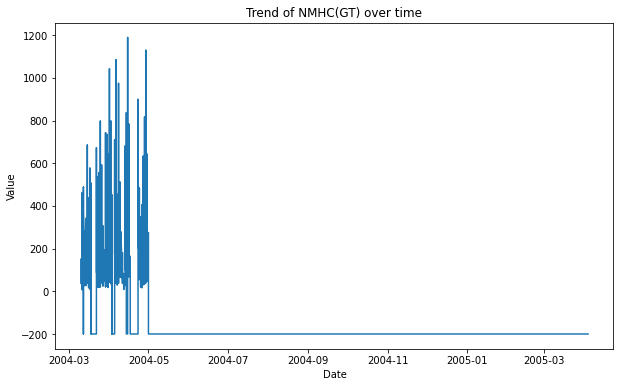

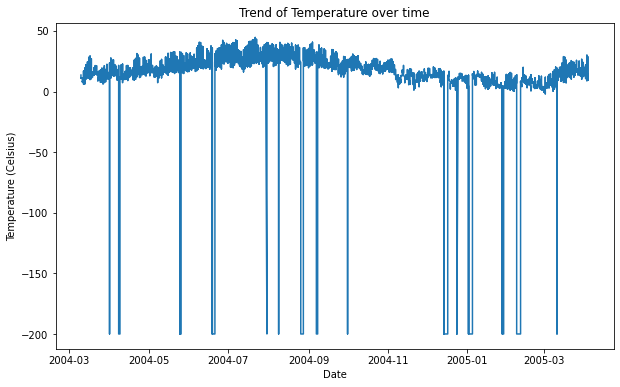

In [279]:
# Convert Date column to datetime object
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['PT08.S1(CO)'])
plt.title('Trend of PT08.S1(CO) over time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['NMHC(GT)'])
plt.title('Trend of NMHC(GT) over time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()


# replace commas with periods in 'T' column values
df['T'] = df['T'].str.replace(',', '.').astype(float)

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['T'])
plt.title('Trend of Temperature over time')
plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.show()


Interpretation:
From the line plots, we can see that PT08.S1(CO) has similar seasonal trends to NMHC(GT) and Temprature. However, there are some periods where PT08.S1(CO) increases while NMHC(GT) and Temprature decrease, indicating that there might be other factors affecting PT08.S1(CO) besides these variables.

b) Dataset cleaning and Feature Engineering.

In [280]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler


###Dataset cleaning

#Drop the last 2 columns from the DataFrame as they contain a lot of missing values.
df = df.iloc[:, :-2]

#Drop duplicates
df = df.drop_duplicates()

#Rename the columns to more meaningful names.
new_columns = {
    'Date': 'date',
    'Time': 'time',
    'CO(GT)': 'true_CO_concentration',
    'PT08.S1(CO)': 'PT08_S1_CO',
    'NMHC(GT)': 'true_NMHC_concentration',
    'C6H6(GT)': 'true_benzene_concentration',
    'PT08.S2(NMHC)': 'PT08_S2_NMHC',
    'NOx(GT)': 'true_NOx_concentration',
    'PT08.S3(NOx)': 'PT08_S3_NOx',
    'NO2(GT)': 'true_NO2_concentration',
    'PT08.S4(NO2)': 'PT08_S4_NO2',
    'PT08.S5(O3)': 'PT08_S5_O3',
    'T': 'temperature',
    'RH': 'humidity',
    'AH': 'absolute_humidity'
}

df = df.rename(columns=new_columns)

#Data type conversion

df['true_CO_concentration'] = pd.to_numeric(df['true_CO_concentration'], errors='coerce')
df['PT08_S1_CO'] = pd.to_numeric(df['PT08_S1_CO'], errors='coerce')
df = df.apply(pd.to_numeric, errors='coerce')
df['true_NMHC_concentration'] = pd.to_numeric(df['true_NMHC_concentration'], errors='coerce')
df['true_benzene_concentration'] = pd.to_numeric(df['true_benzene_concentration'], errors='coerce')
df['PT08_S2_NMHC'] = pd.to_numeric(df['PT08_S2_NMHC'], errors='coerce')
df['true_NOx_concentration'] = pd.to_numeric(df['true_NOx_concentration'], errors='coerce')
df['PT08_S3_NOx'] = pd.to_numeric(df['PT08_S3_NOx'], errors='coerce')
df['true_NO2_concentration'] = pd.to_numeric(df['true_NO2_concentration'], errors='coerce')

df['PT08_S4_NO2'] = pd.to_numeric(df['PT08_S4_NO2'], errors='coerce')

df['PT08_S5_O3'] = pd.to_numeric(df['PT08_S5_O3'], errors='coerce')
df['temperature'] = pd.to_numeric(df['temperature'], errors='coerce')
df['absolute_humidity'] = pd.to_numeric(df['absolute_humidity'], errors='coerce')

#Replace the missing values (marked as -200) with NaN values.
df = df.replace(-200, np.nan)

#Check for any remaining missing values and handle them as needed (e.g. drop rows or impute values).

print(df.isnull().sum())


# Drop the rows with missing values in the target variable
df.dropna(subset=['PT08_S1_CO'], inplace=True)

####Feature Engineering.

#Feature scaling

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)


date                             0
time                          9358
true_CO_concentration         8813
PT08_S1_CO                     367
true_NMHC_concentration       8444
true_benzene_concentration    9358
PT08_S2_NMHC                   367
true_NOx_concentration        1640
PT08_S3_NOx                    367
true_NO2_concentration        1643
PT08_S4_NO2                    367
PT08_S5_O3                     367
temperature                    367
humidity                      9358
absolute_humidity             9358
dtype: int64


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_data.py:473: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_data.py:474: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


c) Data preparation for ML (e.g., scaling, train/test/validation split)

In [281]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer




#split the dataset into input features (X) and target variable (y)

X = df.drop('PT08_S1_CO', axis=1)
y = df['PT08_S1_CO']

#Split the data into training, validation, and test sets


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

#Scale the input features 


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)



/usr/local/lib/python3.9/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.9/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.9/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction**2 / new_sample_count


d) Train Ridge, Lasso and Elastic Regression. (Find the best hyperparameters for each model by trial and error. (Alpha for Ridge and Lasso. Alpha and l1_ratio for Elastic).

In [282]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


# Create a pipeline for Ridge regression
ridge_pipe = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    Ridge()
)
# Create a pipeline for lasso regression

lasso_pipe = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    Lasso()
)
# Create a pipeline for elastic regression

elastic_pipe = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    ElasticNet()
)

# Define the hyperparameter grids
ridge_param_grid = {'ridge__alpha': [0.1, 1, 10]}
lasso_param_grid = {'lasso__alpha': [0.1, 1, 10]}
elastic_param_grid = {'elasticnet__alpha': [0.1, 1, 10], 'elasticnet__l1_ratio': [0.25, 0.5, 0.75]}



# Create a GridSearchCV object for Ridge regression and fit to training data
ridge_cv = GridSearchCV(ridge_pipe, ridge_param_grid, cv=5, scoring='neg_mean_squared_error' ,  error_score='raise')
ridge_cv.fit(X_train, y_train )

# Create a GridSearchCV object for lasso regression and fit to training data

lasso_cv = GridSearchCV(lasso_pipe, lasso_param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_cv.fit(X_train, y_train)

# Create a GridSearchCV object for elastic regression and fit to training data

elastic_cv = GridSearchCV(elastic_pipe, elastic_param_grid, cv=5, scoring='neg_mean_squared_error')
elastic_cv.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding MSE scores
print('Ridge: best alpha =', ridge_cv.best_params_['ridge__alpha'], ' MSE =', -ridge_cv.best_score_)
print('Lasso: best alpha =', lasso_cv.best_params_['lasso__alpha'], ' MSE =', -lasso_cv.best_score_)
print('ElasticNet: best alpha =', elastic_cv.best_params_['elasticnet__alpha'], 'best l1_ratio =', elastic_cv.best_params_['elasticnet__l1_ratio'], ' MSE =', -elastic_cv.best_score_)


Ridge: best alpha = 10  MSE = 5883.683589607443
Lasso: best alpha = 0.1  MSE = 5882.679601966442
ElasticNet: best alpha = 0.1 best l1_ratio = 0.75  MSE = 5901.233878825231


e) Train the three final model with best hyperparameters and report MSE and R2 on test data.

In [283]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define the pipelines
ridge_pipe = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    Ridge(alpha=10)
)

lasso_pipe = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    Lasso(alpha=0.1)
)

elastic_pipe = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.75)
)

# Fit the pipelines to the training data
ridge_pipe.fit(X_train, y_train)
lasso_pipe.fit(X_train, y_train)
elastic_pipe.fit(X_train, y_train)

# Evaluate the pipelines on the test data
y_pred_ridge = ridge_pipe.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

y_pred_lasso = lasso_pipe.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

y_pred_elastic = elastic_pipe.predict(X_test)
mse_elastic = mean_squared_error(y_test, y_pred_elastic)
r2_elastic = r2_score(y_test, y_pred_elastic)

# Report the performance metrics
print("Ridge regression test MSE: {:.4f}".format(mse_ridge))
print("Ridge regression test R2 score: {:.4f}".format(r2_ridge))

print("Lasso regression test MSE: {:.4f}".format(mse_lasso))
print("Lasso regression test R2 score: {:.4f}".format(r2_lasso))

print("ElasticNet regression test MSE: {:.4f}".format(mse_elastic))
print("ElasticNet regression test R2 score: {:.4f}".format(r2_elastic))


Ridge regression test MSE: 6125.4358
Ridge regression test R2 score: 0.8690
Lasso regression test MSE: 6126.4585
Lasso regression test R2 score: 0.8690
ElasticNet regression test MSE: 6121.4830
ElasticNet regression test R2 score: 0.8691
